In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from io import StringIO

In [4]:
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['figure.figsize']=(7,6)

In [3]:
data15 = """
Year	Quarters	Markov order	Layers	Physical nodes	State nodes	Links	State entropy rate	Physical entropy rate	Modules	Module perplexity	Overlap	Seconds
2011	1+2+3+4	1	1	438	438	9681	5.11	5.11	3	1	1	0.012
2011	1+2,3+4	1	2	438	861	34384	5.46	5.09	8	1.15	1	0.084
2011	1,2,3,4	1	4	438	1683	121749	5.78	5.05	10	1.23	1	0.29
2011	1+2+3+4	2	1	438	9681	181326	3.79	3.79	120	10.97	3.46	1.9
2011	1+2,3+4	2	2	438	17203	614472	4.11	3.75	209	13.51	3.6	6.7
2011	1,2,3,4	2	4	438	30489	2014650	4.32	3.69	218	12.28	3.71	27
2011	1+2+3+4	3	1	432	180900	465456	1.11	1.11	3759	9.13	3.95	264
2011	1+2,3+4	3	2	432	307904	1406605	1.1	0.92	6293	17.64	5.81	1057
2011	1,2,3,4	3	4	432	507054	4112089	1.16	0.86	6195	16.22	4.81	2607
"""

In [4]:
d15 = pd.read_csv(StringIO(data15), sep='\t')

In [5]:
d15.head()

,Year,Quarters,Markov order,Layers,Physical nodes,State nodes,Links,State entropy rate,Physical entropy rate,Modules,Module perplexity,Overlap,Seconds
0,2011,1+2+3+4,1,1,438,438,9681,5.11,5.11,3,1.00,1.00,0.012
1,2011,"1+2,3+4",1,2,438,861,34384,5.46,5.09,8,1.15,1.00,0.084
2,2011,"1,2,3,4",1,4,438,1683,121749,5.78,5.05,10,1.23,1.00,0.290
3,2011,1+2+3+4,2,1,438,9681,181326,3.79,3.79,120,10.97,3.46,1.900
4,2011,"1+2,3+4",2,2,438,17203,614472,4.11,3.75,209,13.51,3.60,6.700


In [6]:
d15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
Year                     9 non-null int64
Quarters                 9 non-null object
Markov order             9 non-null int64
Layers                   9 non-null int64
Physical nodes           9 non-null int64
State nodes              9 non-null int64
Links                    9 non-null int64
State entropy rate       9 non-null float64
Physical entropy rate    9 non-null float64
Modules                  9 non-null int64
Module perplexity        9 non-null float64
Overlap                  9 non-null float64
Seconds                  9 non-null float64
dtypes: float64(5), int64(7), object(1)
memory usage: 1016.0+ bytes


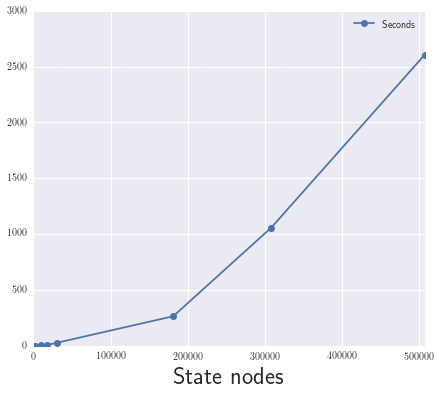

In [7]:
d15.plot(x='State nodes', y='Seconds', style='o-');

In [8]:
def plotTimeComplexities(Seconds, N_S, N_L, title):
    Y = Seconds.values
#     title='Infomap time complexity as a function of number of state nodes $N_S$ and number of links $N_L$'
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize = (15,20))
    fig.suptitle(title, fontsize=20)
    pd.Series(Y, index=N_S.values).rename_axis('$N_S$').plot(ax=axes[0,0], style='o-');
    pd.Series(Y, index=(N_S*np.log(N_S)).values).rename_axis('$N_S*log(N_S)$').plot(ax=axes[0,1], style='o-');
    pd.Series(Y, index=(N_S*N_S).values).rename_axis('$N_S*N_S$').plot(ax=axes[0,2], style='o-');
    pd.Series(Y, index=N_L.values).rename_axis('$N_L$').plot(ax=axes[1,0], style='o-');
    pd.Series(Y, index=(N_L*np.log(N_L)).values).rename_axis('$N_L*log(N_L)$').plot(ax=axes[1,1], style='o-');
    pd.Series(Y, index=(N_L*N_L).values).rename_axis('$N_L*N_L$').plot(ax=axes[1,2], style='o-');
    pd.Series(Y, index=(N_S*N_L).values).rename_axis('$N_S*N_L$').plot(ax=axes[2,0], style='o-');
    pd.Series(Y, index=(N_S*np.log(N_S)*N_L).values).rename_axis('$N_S*log(N_S)*N_L$').plot(ax=axes[2,1], style='o-');
    pd.Series(Y, index=(N_S*N_L*np.log(N_L)).values).rename_axis('$N_S*N_L*log(N_L)$').plot(ax=axes[2,2], style='o-');
    pd.Series(Y, index=(N_S*np.log(N_L)).values).rename_axis('$N_S*log(N_L)$').plot(ax=axes[3,0], style='o-');
    pd.Series(Y, index=(np.log(N_S)*N_L).values).rename_axis('$log(N_S)*N_L$').plot(ax=axes[3,1], style='o-');
    pd.Series(Y, index=(N_S*np.log(N_S)*np.log(N_L)).values).rename_axis('$N_S*log(N_S)*log(N_L)$').plot(ax=axes[3,2], style='o-');
    plt.tight_layout(pad=4)

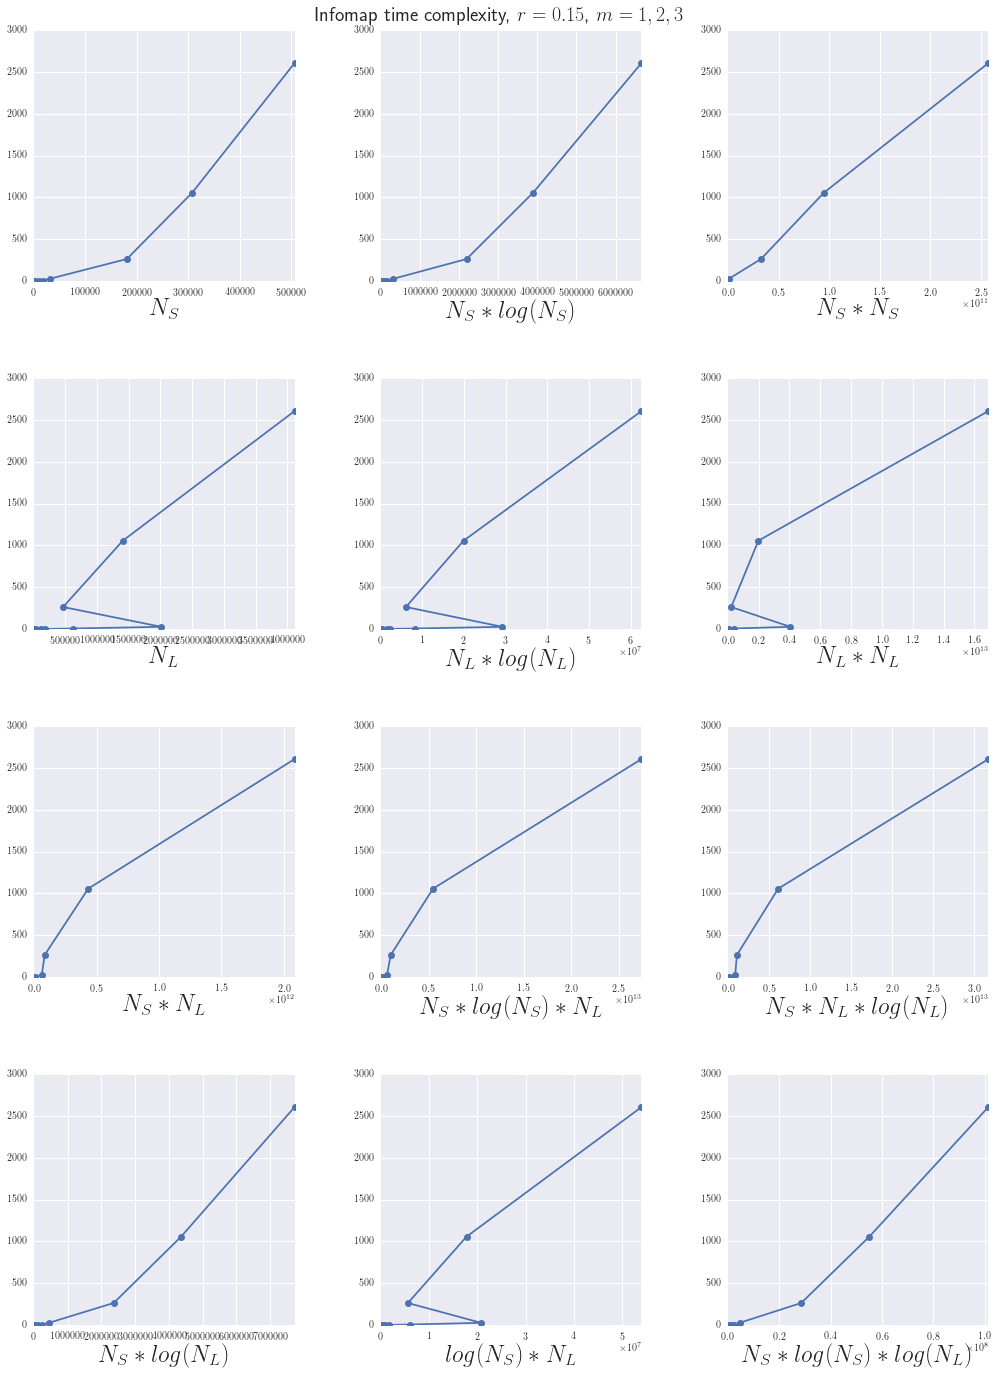

In [9]:
plotTimeComplexities(d15['Seconds'], N_S=d15['State nodes'], N_L=d15['Links'],
                     title="Infomap time complexity, $r=0.15$, $m=1,2,3$")

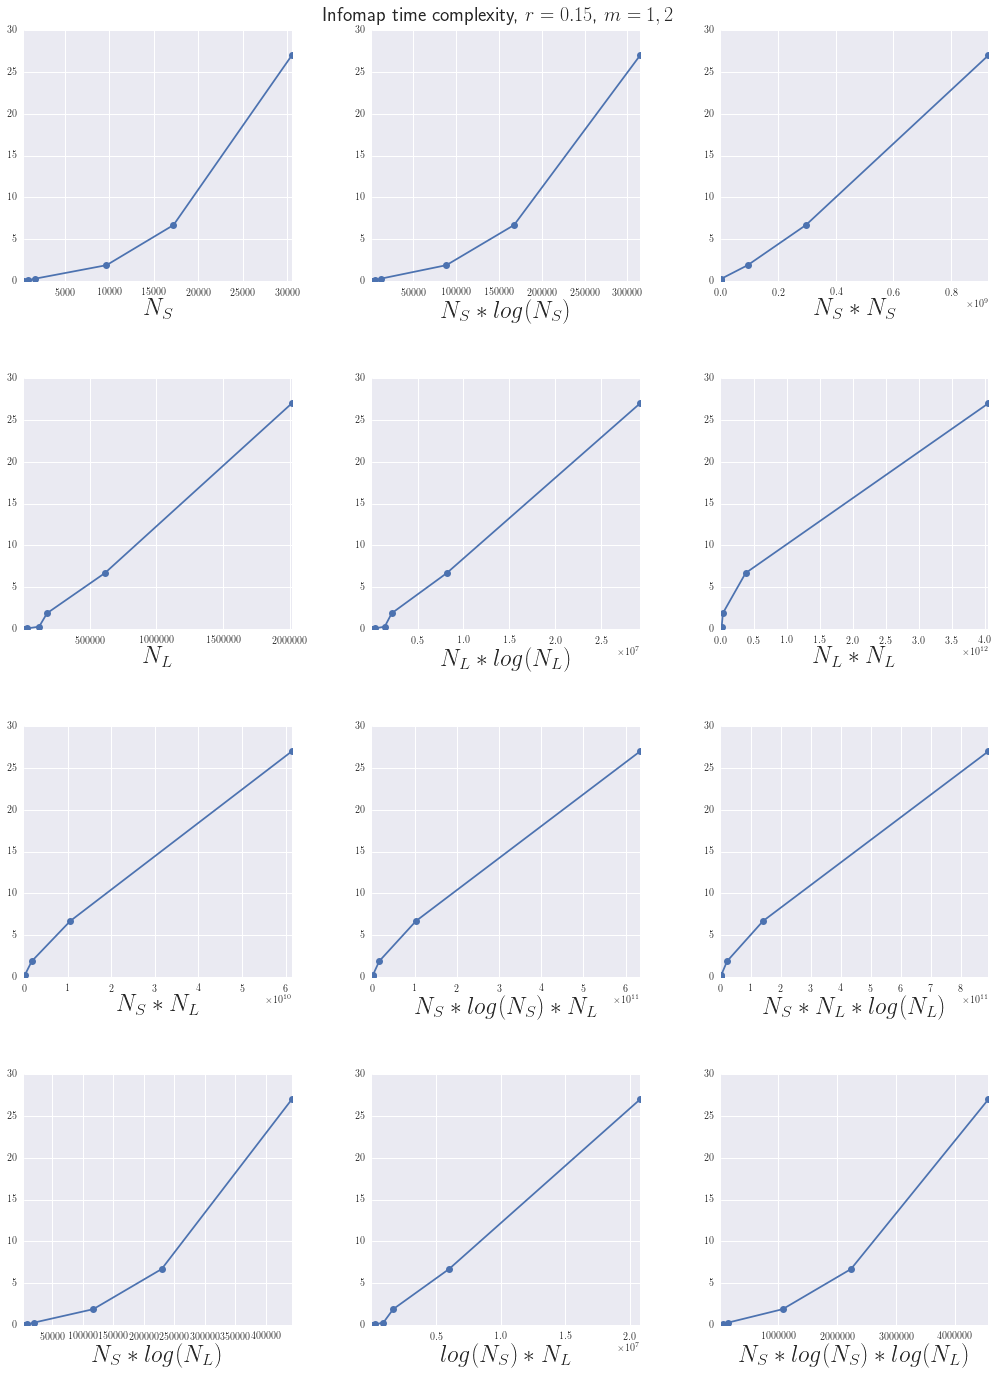

In [10]:
plotTimeComplexities(d15['Seconds'][0:6], N_S=d15['State nodes'][0:6], N_L=d15['Links'][0:6],
                     title="Infomap time complexity, $r=0.15$, $m=1,2$")

In [11]:
data25 = """
Year	Quarters	Markov order	Layers	Physical nodes	State nodes	Links	State entropy rate	Physical entropy rate	Modules	Module perplexity	Overlap	Seconds
2011	1+2+3+4	1	1	438	438	9681	5.11	5.11	3	1	1	0.012
2011	1+2,3+4	1	2	438	861	34384	5.55	5.05	13	1.24	1	0.055
2011	1,2,3,4	1	4	438	1683	121749	6	4.96	21	4.01	1	0.13
2011	1+2+3+4	2	1	438	9681	181326	3.79	3.79	120	10.97	3.46	1.9
2011	1+2,3+4	2	2	438	17203	614472	4.27	3.75	219	14.6	3.73	7.04
2011	1,2,3,4	2	4	438	30489	2014650	4.63	3.71	245	13.35	3.37	17.36
2011	1+2+3+4	3	1	432	180900	465456	1.11	1.11	3759	9.13	3.95	264
2011	1+2,3+4	3	2	432	307904	1406605	1.1	0.92				
2011	1,2,3,4	3	4	432	507054	4112089	1.16	0.86				
"""

In [12]:
d25 = pd.read_csv(StringIO(data25), sep='\t')

In [13]:
d25

,Year,Quarters,Markov order,Layers,Physical nodes,State nodes,Links,State entropy rate,Physical entropy rate,Modules,Module perplexity,Overlap,Seconds
0,2011,1+2+3+4,1,1,438,438,9681,5.11,5.11,3.0,1.00,1.00,0.012
1,2011,"1+2,3+4",1,2,438,861,34384,5.55,5.05,13.0,1.24,1.00,0.055
2,2011,"1,2,3,4",1,4,438,1683,121749,6.00,4.96,21.0,4.01,1.00,0.130
3,2011,1+2+3+4,2,1,438,9681,181326,3.79,3.79,120.0,10.97,3.46,1.900
4,2011,"1+2,3+4",2,2,438,17203,614472,4.27,3.75,219.0,14.60,3.73,7.040
5,2011,"1,2,3,4",2,4,438,30489,2014650,4.63,3.71,245.0,13.35,3.37,17.360
6,2011,1+2+3+4,3,1,432,180900,465456,1.11,1.11,3759.0,9.13,3.95,264.000
7,2011,"1+2,3+4",3,2,432,307904,1406605,1.10,0.92,NaN,NaN,NaN,NaN
8,2011,"1,2,3,4",3,4,432,507054,4112089,1.16,0.86,NaN,NaN,NaN,NaN


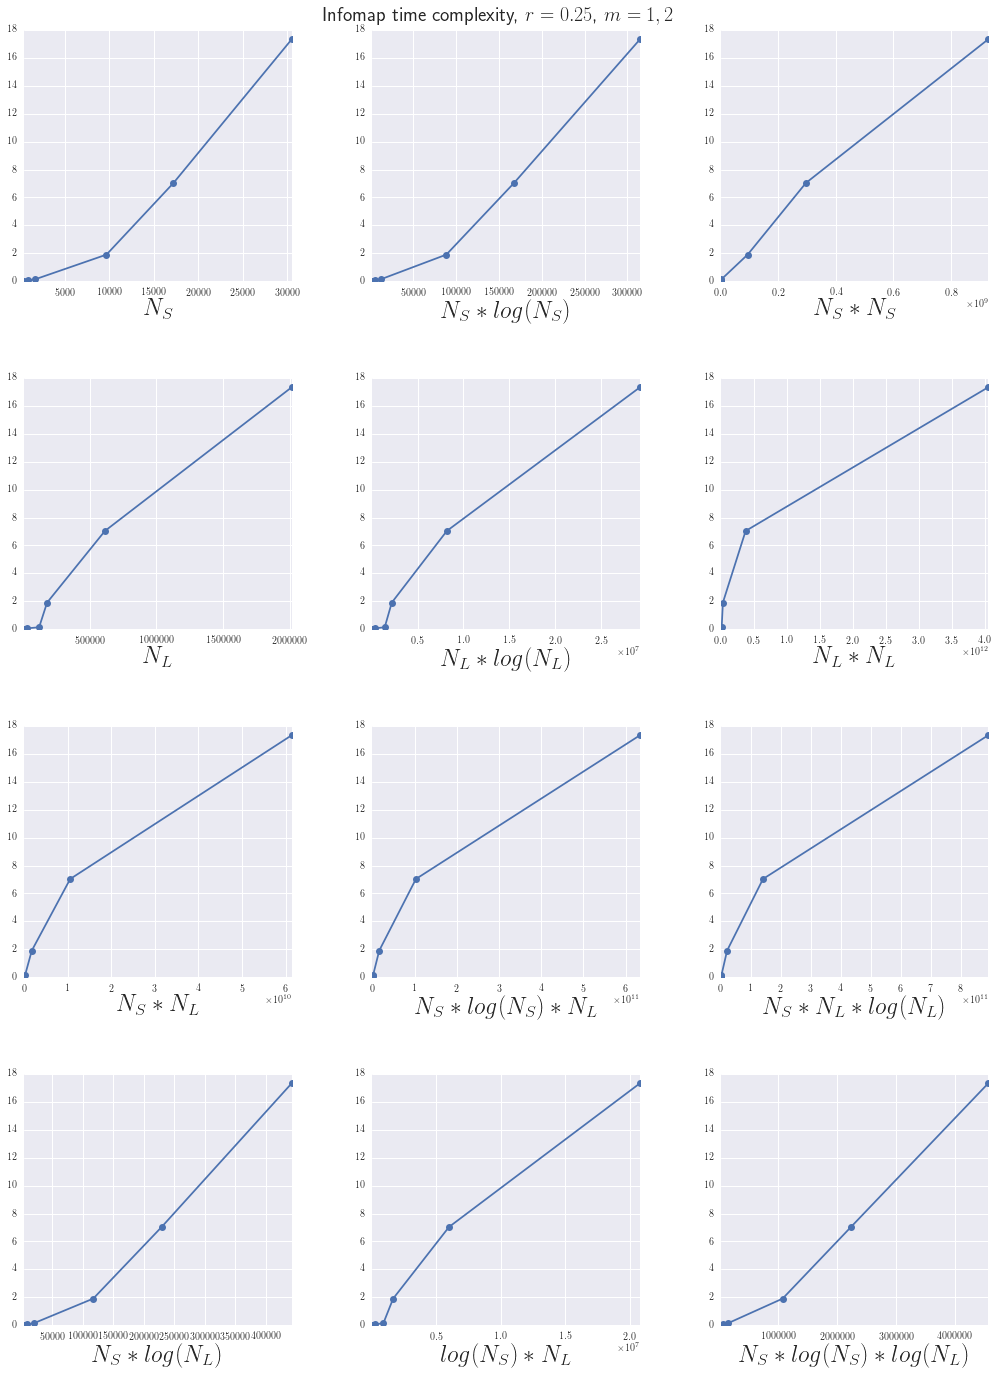

In [14]:
plotTimeComplexities(d25['Seconds'][0:6], N_S=d25['State nodes'][0:6], N_L=d25['Links'][0:6],
                     title="Infomap time complexity, $r=0.25$, $m=1,2$")

## Multilevel algorithm @gates
Multilayer state networks generated with relax rate `r=0.25`.

Example run:
```
./Infomap data/2011_1_2_3_4_states_3_r25.net data -i states -zd -N10
```

In [1]:
data25Multi = """
Year	Quarters	Markov order	Layers	Physical nodes	State nodes	Links	State entropy rate	Physical entropy rate	Top modules	Top perplexity	Top overlap	Bottom modules	Bottom perplexity	Bottom overlap	Depth	Weighted depth	Seconds	Codelength
2011	1+2+3+4	1	1	438	438	9681	5.11	5.11	3	1	1	3	1	1	2	2	0.016	6.08
2011	1+2,3+4	1	2	438	861	34384	5.55	5.05	13	1.24	1	13	1.24	1	2	2	0.063	6.11
2011	1,2,3,4	1	4	438	1683	121749	6	4.96	21	4.01	1	21	4.01	1	2	2	0.14	6.17
2011	1+2+3+4	2	1	438	9681	181326	3.79	3.79	92	7.26	2.59	129	13.3	3.65	3	2.44	1.7	5.92
2011	1+2,3+4	2	2	438	17203	614472	4.27	3.75	5	1	1	231	14.8	3.79	4	3	10	5.77
2011	1,2,3,4	2	4	438	30489	2014650	4.63	3.71	4	1	1	257	13.2	3.3	4	3	27	5.83
2011	1+2+3+4	3	1	432	180900	465456	1.11	1.11	2340	1.04	1.03	6648	25	5.71	7	4	492	4.76
2011	1+2,3+4	3	2	432	307904	1406605	1.2	0.95	2522	1.33	1.3	12010	31.6	5.04	6	3.04	1290	3.84
2011	1,2,3,4	3	4	432	507054	4112089	1.33	0.91	2582	1.24	1.15	10824	19	3.83	6	3.02	3125	3.87
"""

In [5]:
d25Multi = pd.read_csv(StringIO(data25Multi), sep='\t')

In [6]:
d25Multi

,Year,Quarters,Markov order,Layers,Physical nodes,State nodes,Links,State entropy rate,Physical entropy rate,Top modules,Top perplexity,Top overlap,Bottom modules,Bottom perplexity,Bottom overlap,Depth,Weighted depth,Seconds,Codelength
0,2011,1+2+3+4,1,1,438,438,9681,5.11,5.11,3,1.00,1.00,3,1.00,1.00,2,2.00,0.016,6.08
1,2011,"1+2,3+4",1,2,438,861,34384,5.55,5.05,13,1.24,1.00,13,1.24,1.00,2,2.00,0.063,6.11
2,2011,"1,2,3,4",1,4,438,1683,121749,6.00,4.96,21,4.01,1.00,21,4.01,1.00,2,2.00,0.140,6.17
3,2011,1+2+3+4,2,1,438,9681,181326,3.79,3.79,92,7.26,2.59,129,13.30,3.65,3,2.44,1.700,5.92
4,2011,"1+2,3+4",2,2,438,17203,614472,4.27,3.75,5,1.00,1.00,231,14.80,3.79,4,3.00,10.000,5.77
5,2011,"1,2,3,4",2,4,438,30489,2014650,4.63,3.71,4,1.00,1.00,257,13.20,3.30,4,3.00,27.000,5.83
6,2011,1+2+3+4,3,1,432,180900,465456,1.11,1.11,2340,1.04,1.03,6648,25.00,5.71,7,4.00,492.000,4.76
7,2011,"1+2,3+4",3,2,432,307904,1406605,1.20,0.95,2522,1.33,1.30,12010,31.60,5.04,6,3.04,1290.000,3.84
8,2011,"1,2,3,4",3,4,432,507054,4112089,1.33,0.91,2582,1.24,1.15,10824,19.00,3.83,6,3.02,3125.000,3.87


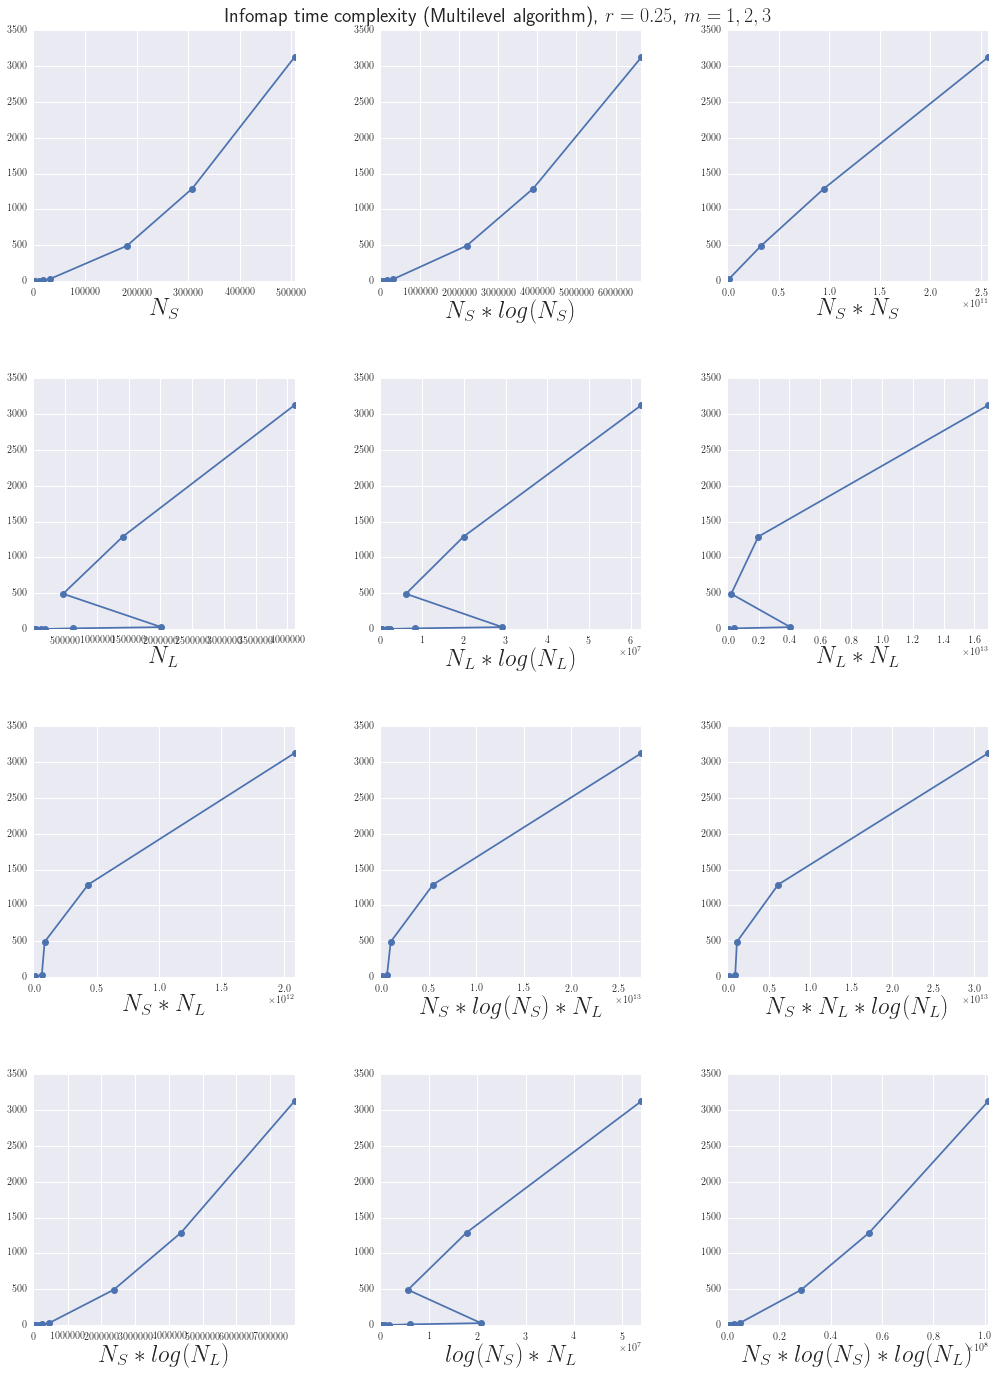

In [9]:
plotTimeComplexities(d25Multi['Seconds'], N_S=d25Multi['State nodes'], N_L=d25Multi['Links'],
                     title="Infomap time complexity (Multilevel algorithm), $r=0.25$, $m=1,2,3$")

In [19]:
data15Louvain = """
Year	Quarters	Markov order	Layers	Physical nodes	State nodes	Links	State entropy rate	Physical entropy rate	Modules	Module perplexity	Overlap	Seconds
2011	1+2+3+4	1	1	438	438	9681	5.11	5.11	2	1	1	0.0037
2011	1+2,3+4	1	2	438	861	34384	5.46	5.09	5	1.22	1	0.023
2011	1,2,3,4	1	4	438	1683	121749	5.78	5.05	9	3.25	1	0.072
2011	1+2+3+4	2	1	438	9681	181326	3.79	3.79	47	8.95	3.23	1.1
2011	1+2,3+4	2	2	438	17203	614472	4.11	3.75	81	7.14	2.63	4.2
2011	1,2,3,4	2	4	438	30489	2014650	4.32	3.69	94	10.7	3.04	13
2011	1+2+3+4	3	1	432	180900	465456	1.11	1.11	3800	9.31	3.75	176
2011	1+2,3+4	3	2	432	307904	1406605	1.1	0.92	5483	15.8	4.22	462
2011	1,2,3,4	3	4	432	507054	4112089	1.16	0.86	5557	13.6	3.75	1304
"""

In [20]:
d15Louvain = pd.read_csv(StringIO(data15Louvain), sep='\t')

In [21]:
d15Louvain

,Year,Quarters,Markov order,Layers,Physical nodes,State nodes,Links,State entropy rate,Physical entropy rate,Modules,Module perplexity,Overlap,Seconds
0,2011,1+2+3+4,1,1,438,438,9681,5.11,5.11,2,1.00,1.00,0.0037
1,2011,"1+2,3+4",1,2,438,861,34384,5.46,5.09,5,1.22,1.00,0.0230
2,2011,"1,2,3,4",1,4,438,1683,121749,5.78,5.05,9,3.25,1.00,0.0720
3,2011,1+2+3+4,2,1,438,9681,181326,3.79,3.79,47,8.95,3.23,1.1000
4,2011,"1+2,3+4",2,2,438,17203,614472,4.11,3.75,81,7.14,2.63,4.2000
5,2011,"1,2,3,4",2,4,438,30489,2014650,4.32,3.69,94,10.70,3.04,13.0000
6,2011,1+2+3+4,3,1,432,180900,465456,1.11,1.11,3800,9.31,3.75,176.0000
7,2011,"1+2,3+4",3,2,432,307904,1406605,1.10,0.92,5483,15.80,4.22,462.0000
8,2011,"1,2,3,4",3,4,432,507054,4112089,1.16,0.86,5557,13.60,3.75,1304.0000


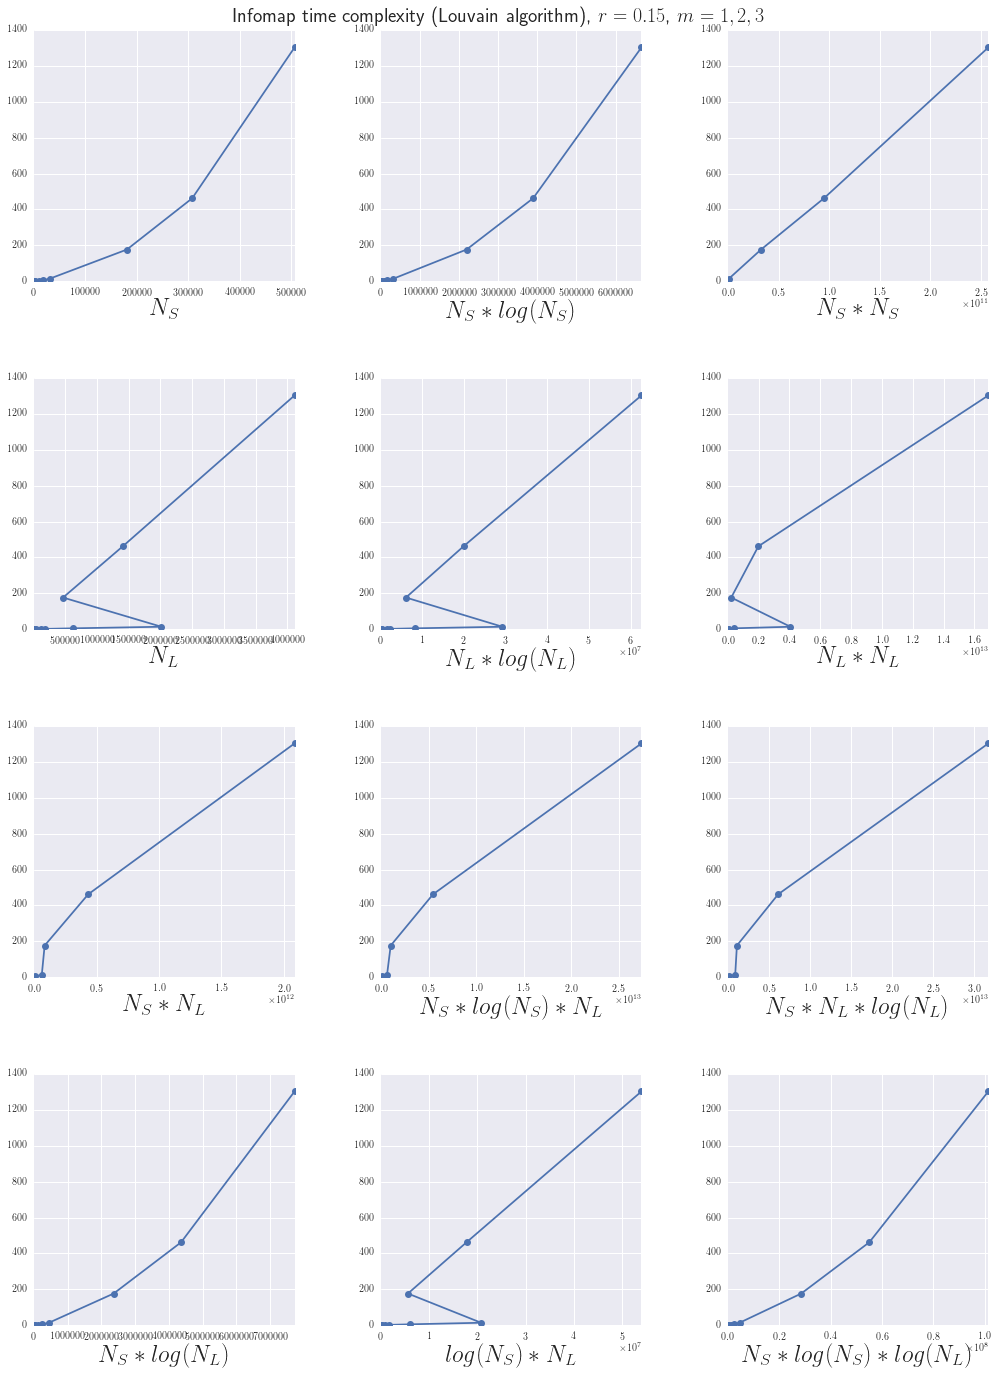

In [22]:
plotTimeComplexities(d15Louvain['Seconds'], N_S=d15Louvain['State nodes'], N_L=d15Louvain['Links'],
                     title="Infomap time complexity (Louvain algorithm), $r=0.15$, $m=1,2,3$")

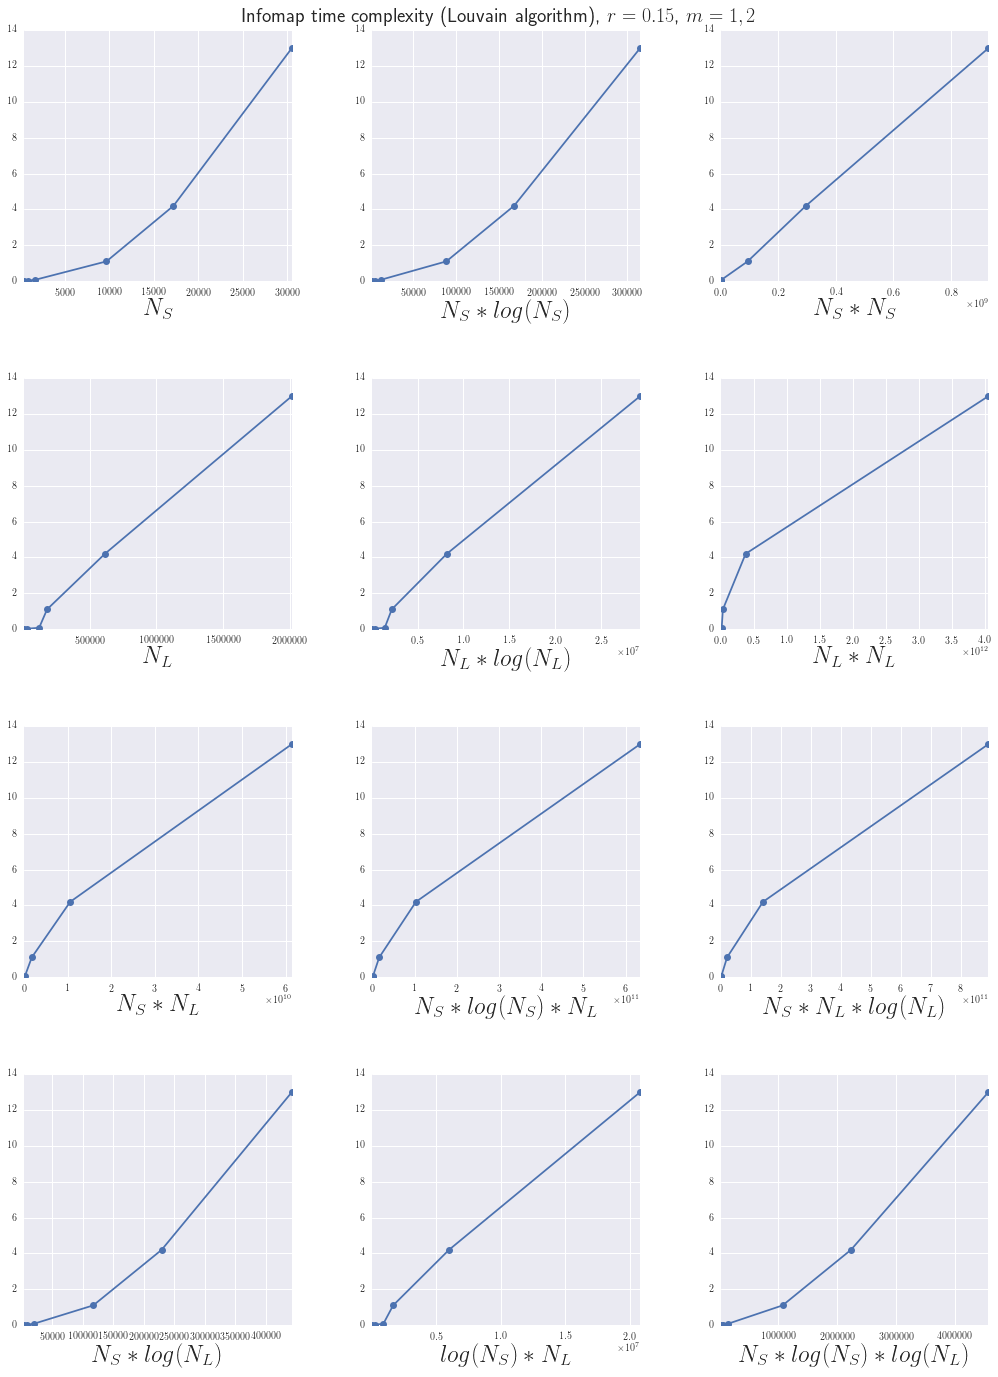

In [23]:
plotTimeComplexities(d15Louvain['Seconds'][0:6], N_S=d15Louvain['State nodes'][0:6], N_L=d15Louvain['Links'][0:6],
                     title="Infomap time complexity (Louvain algorithm), $r=0.15$, $m=1,2$")

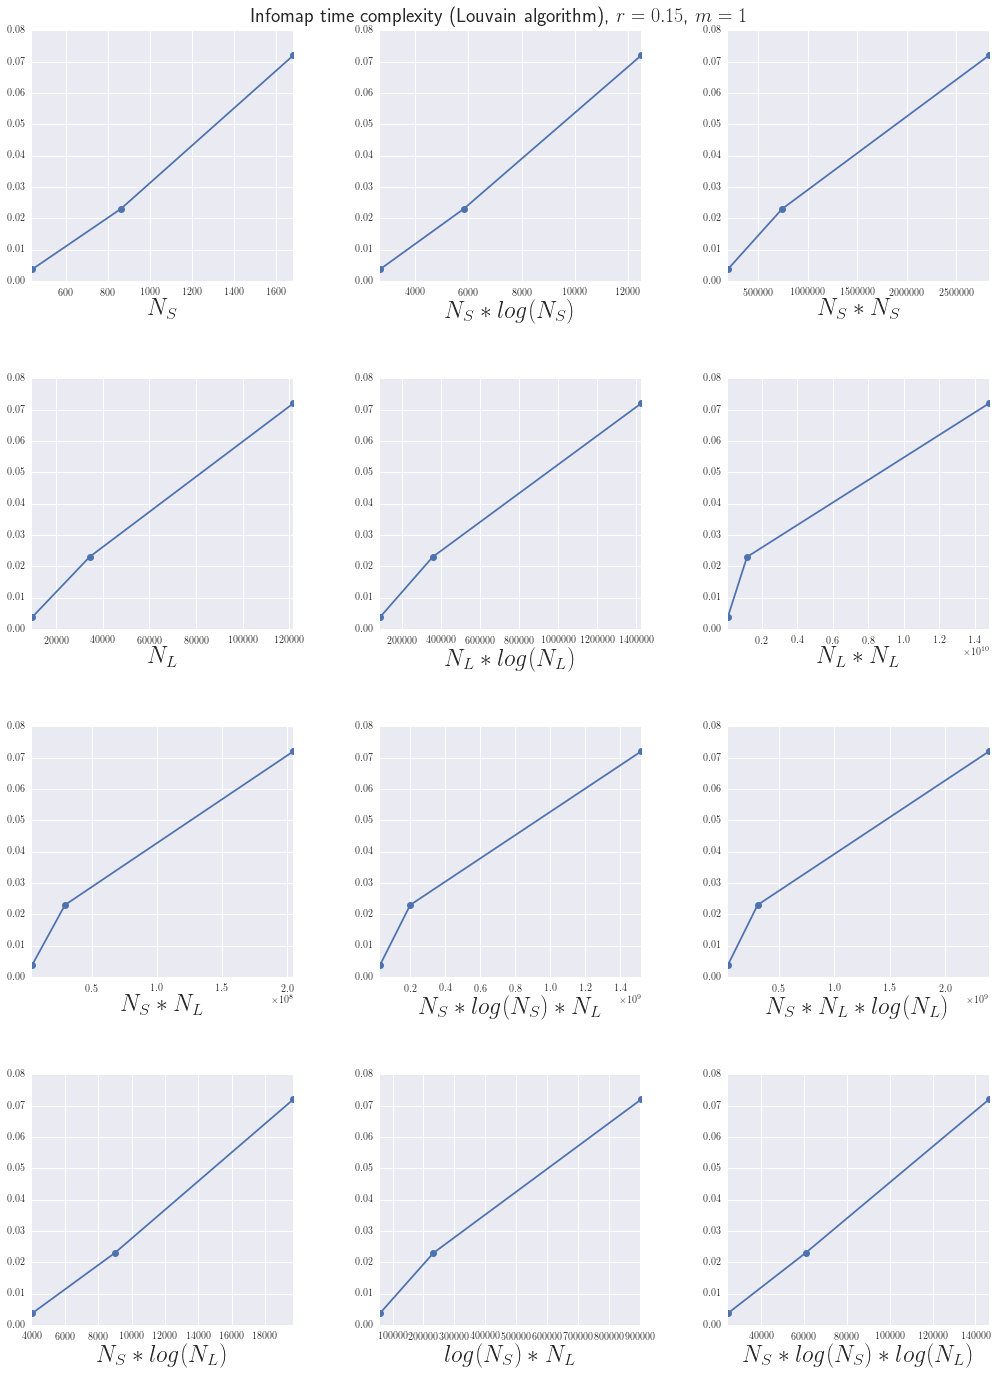

In [24]:
plotTimeComplexities(d15Louvain['Seconds'][0:3], N_S=d15Louvain['State nodes'][0:3], N_L=d15Louvain['Links'][0:3],
                     title="Infomap time complexity (Louvain algorithm), $r=0.15$, $m=1$")

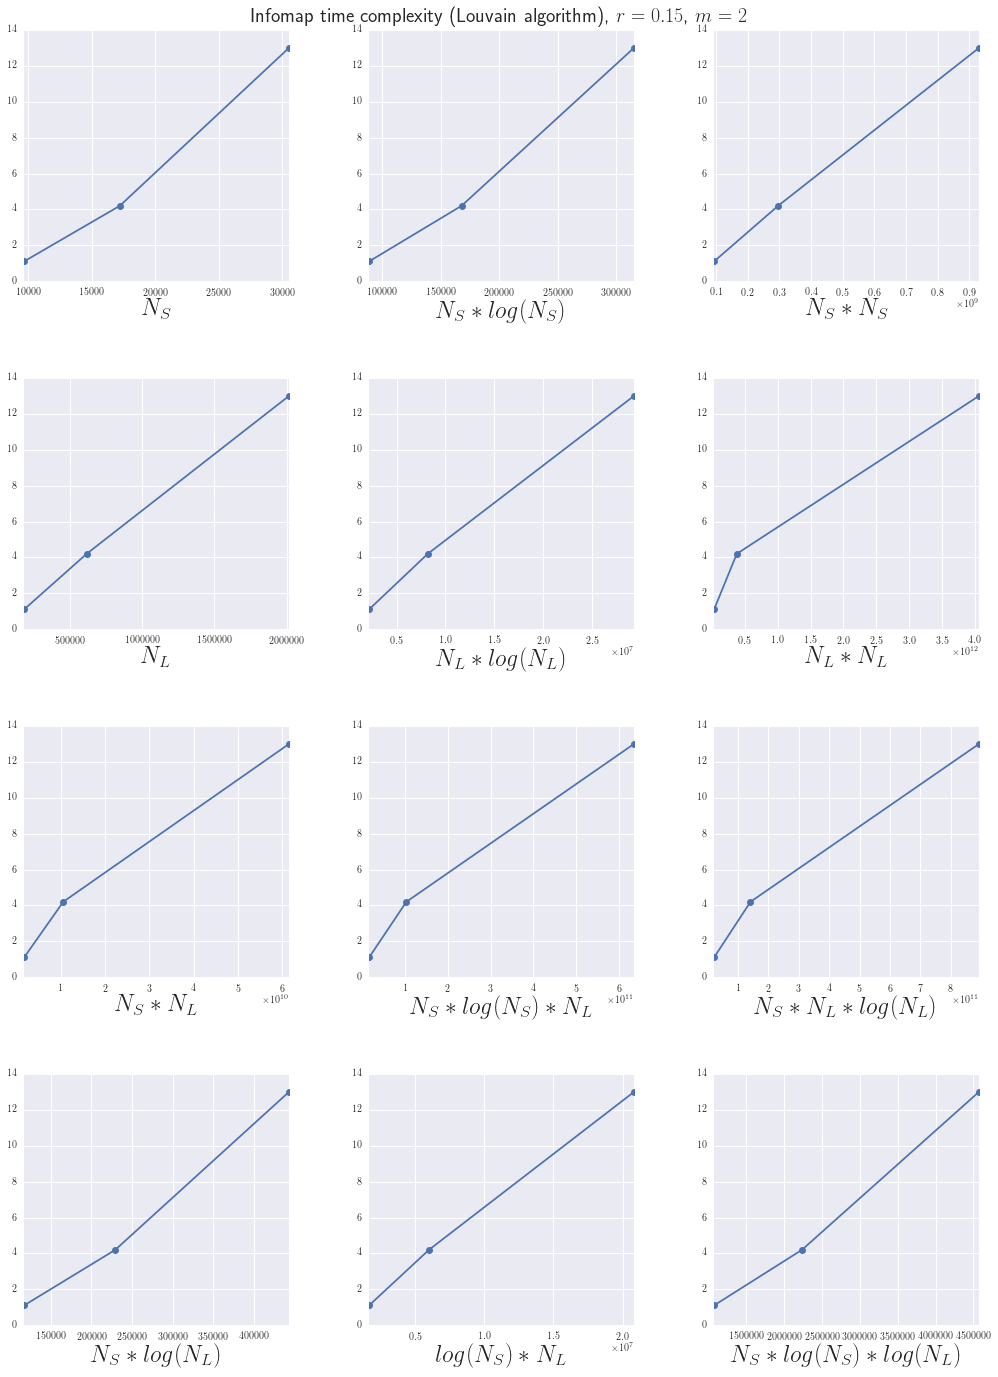

In [25]:
plotTimeComplexities(d15Louvain['Seconds'][3:6], N_S=d15Louvain['State nodes'][3:6], N_L=d15Louvain['Links'][3:6],
                     title="Infomap time complexity (Louvain algorithm), $r=0.15$, $m=2$")

In [26]:
data100Louvain = """
Year	Quarters	Markov order	Layers	Physical nodes	State nodes	Links	State entropy rate	Physical entropy rate	Modules	Module perplexity	Overlap	Seconds
2011	1+2+3+4	1	1	438	438	9681	5.11	5.11	2	1	1	0.0037
2011	1+2,3+4	1	2	438	861	34384	5.29	4.53	169	32.3	1	0.031
2011	1,2,3,4	1	4	438	1683	121749	6.03	4.19	255	48.8	1	0.085
2011	1+2+3+4	2	1	438	9681	181326	3.79	3.79	47	8.95	3.23	1.1
2011	1+2,3+4	2	2	438	17203	614472	4.71	3.78	346	14.8	3.56	1.77
2011	1,2,3,4	2	4	438	30489	2014650	5.6	3.77	437	15.4	3.23	5.23
2011	1+2+3+4	3	1	432	180900	465456	1.11	1.11	3800	9.31	3.75	176
2011	1+2,3+4	3	2	432	307904	1406605	1.48	1.05				
2011	1,2,3,4	3	4	432	507054	4112089	1.89	1.07				
"""

In [27]:
d100Louvain = pd.read_csv(StringIO(data100Louvain), sep='\t')

In [28]:
d100Louvain

,Year,Quarters,Markov order,Layers,Physical nodes,State nodes,Links,State entropy rate,Physical entropy rate,Modules,Module perplexity,Overlap,Seconds
0,2011,1+2+3+4,1,1,438,438,9681,5.11,5.11,2.0,1.00,1.00,0.0037
1,2011,"1+2,3+4",1,2,438,861,34384,5.29,4.53,169.0,32.30,1.00,0.0310
2,2011,"1,2,3,4",1,4,438,1683,121749,6.03,4.19,255.0,48.80,1.00,0.0850
3,2011,1+2+3+4,2,1,438,9681,181326,3.79,3.79,47.0,8.95,3.23,1.1000
4,2011,"1+2,3+4",2,2,438,17203,614472,4.71,3.78,346.0,14.80,3.56,1.7700
5,2011,"1,2,3,4",2,4,438,30489,2014650,5.60,3.77,437.0,15.40,3.23,5.2300
6,2011,1+2+3+4,3,1,432,180900,465456,1.11,1.11,3800.0,9.31,3.75,176.0000
7,2011,"1+2,3+4",3,2,432,307904,1406605,1.48,1.05,NaN,NaN,NaN,NaN
8,2011,"1,2,3,4",3,4,432,507054,4112089,1.89,1.07,NaN,NaN,NaN,NaN


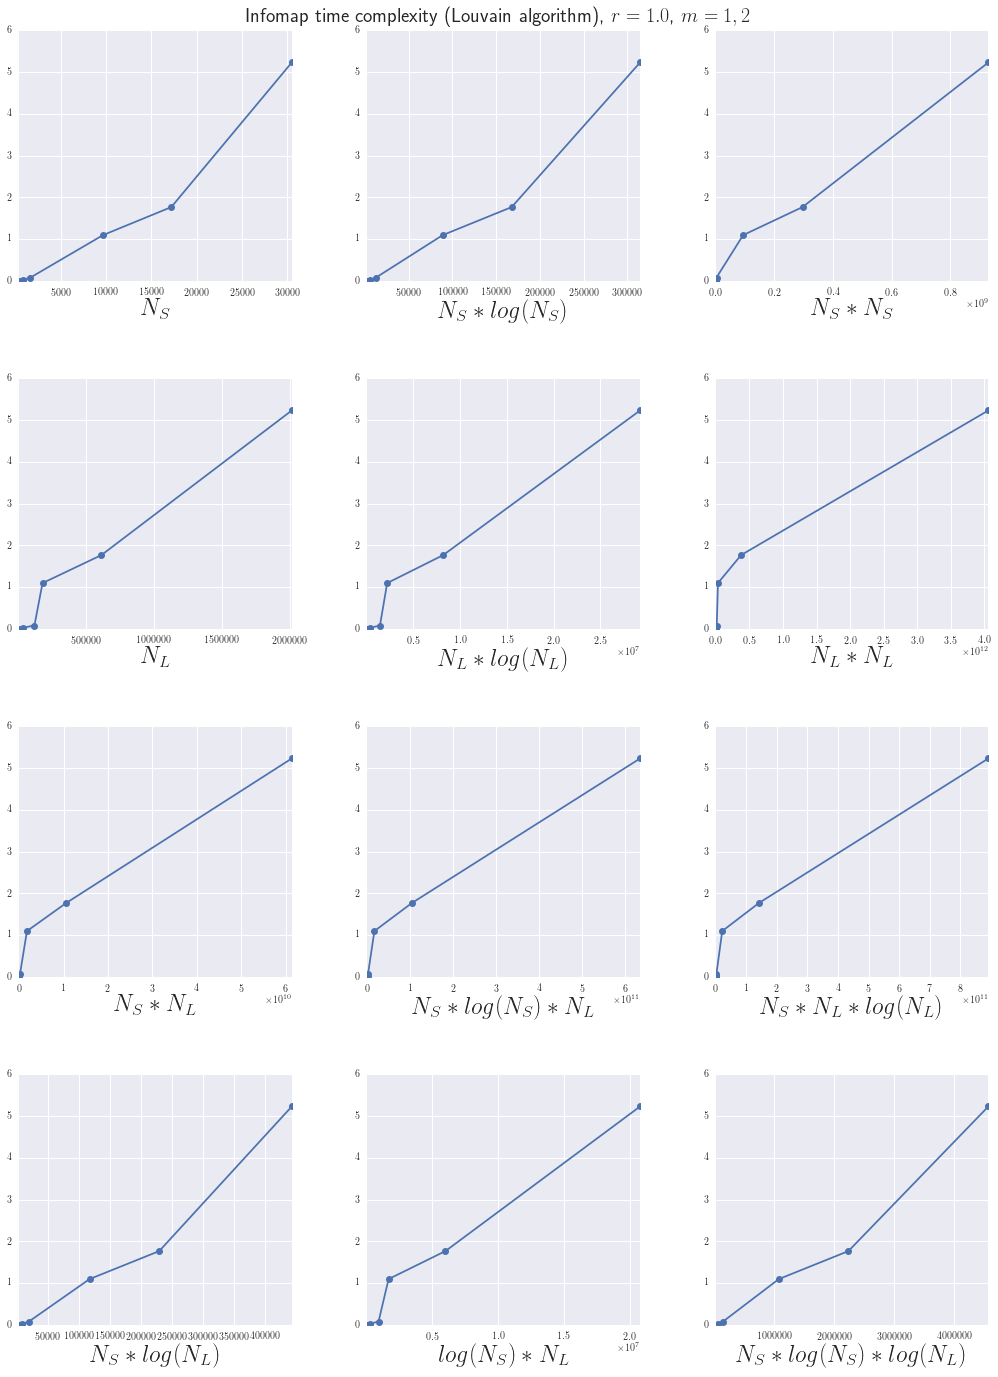

In [29]:
plotTimeComplexities(d100Louvain['Seconds'][0:6], N_S=d100Louvain['State nodes'][0:6], N_L=d100Louvain['Links'][0:6],
                     title="Infomap time complexity (Louvain algorithm), $r=1.0$, $m=1,2$")